# Class on Brownian Motion
- 1-D Brownian Motion
- 2-D Brownian Motion
- Geometric Brownian Motion

In [180]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [176]:
# 1-D Brownian Motion
class Brownian_1D:
    '''
    1-D Brownian Motion
    x0: float, initial position
    steps: int, number of steps
    step_size: float, step size
    bias: float, less than 1, how likely the particle is going up or right
    '''
    def __init__(self, x0=0, steps=1000, step_size=1, bias=0.5):
        self.x = [x0]
        self.t=[0]
        self.steps = steps
        self.step_size=step_size
        self.bias=bias
    def main(self):
        for i in range(self.steps):
            size = self.step_size
            s = np.random.choice([-size, size], p=[1-self.bias, self.bias])
            next_step = self.x[-1] + s
            self.x.append(next_step)
            self.t.append(self.t[-1]+1)
        return self.t, self.x
    def show(self):
        plt.plot(self.t, self.x)
        plt.show()

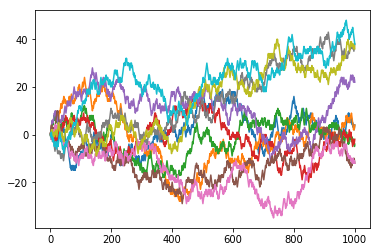

In [177]:
num_sim = 10
for _ in range(num_sim):
    sim = Brownian_1D()
    x, y = sim.main()
    plt.plot(x, y)
plt.show()

In [178]:
# Macro-variables
num_sim = 1000
n = 1000
S = []
for i in range(num_sim):
    sim = Brownian_1D(steps=n)
    _, x = sim.main()
    S.append(x[-1])
print(f"{num_sim} micro-states")
print(f"Mean: {np.mean(S)}")
print(f"Standard Deviation: {np.std(S)}")

1000 micro-states
Mean: 1.956
Standard Deviation: 31.517710322927964


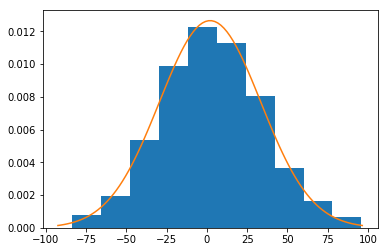

In [181]:
# visualize the distribution -- Does this support the CLT?
plt.hist(S, density=True)
mu = np.mean(S)
sigma = np.std(S)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [37]:
num_sim = 1000
n = 2000
S = []
for i in range(num_sim):
    sim = Brownian_1D(steps=n)
    _, x = sim.main()
    S.append(x[-1])
print(f"{num_sim} micro-states")
print(f"Mean: {np.mean(S)}")
print(f"Standard Deviation: {np.std(S)}")

1000 micro-states
Mean: -0.138
Standard Deviation: 43.48048937167106


# Biased Coin

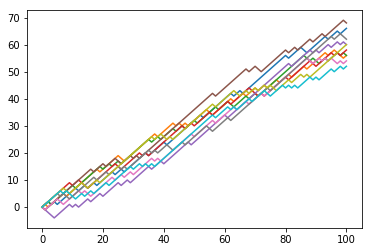

In [182]:
num_sim = 10
n = 100
bias = 0.8
for _ in range(num_sim):
    sim = Brownian_1D(steps=n, bias=bias)
    x, y = sim.main()
    plt.plot(x, y)
plt.show()

In [183]:
num_sim = 1000
n = 100
bias = 0.8
S = []
for i in range(num_sim):
    sim = Brownian_1D(steps=n, bias=bias)
    _, x = sim.main()
    S.append(x[-1])
print(f"{num_sim} micro-states")
print(f"Mean: {np.mean(S)}")
print(f"Standard Deviation: {np.std(S)}")

1000 micro-states
Mean: 59.982
Standard Deviation: 8.12623381401249


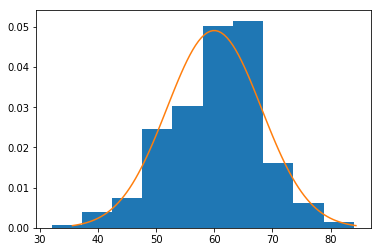

In [184]:
# visualize the distribution -- Does this support the CLT?
plt.hist(S, density=True)
mu = np.mean(S)
sigma = np.std(S)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [185]:
num_sim = 1000
n = 1000
bias = 0.8
S = []
for i in range(num_sim):
    sim = Brownian_1D(steps=n, bias=bias)
    _, x = sim.main()
    S.append(x[-1])
print(f"{num_sim} micro-states")
print(f"Mean: {np.mean(S)}")
print(f"Standard Deviation: {np.std(S)}")

1000 micro-states
Mean: 599.91
Standard Deviation: 25.260164290835483


# 2-D Brownian Motion

In [186]:
# 2-D Brownian Motion
class Brownian_2D:
    '''
    2-D Brownian Motion
    init: numpy array, initial position
    steps: int, number of steps
    step_size: float, step size
    bias: float, less than 1, how likely the particle is going up or right
    '''
    def __init__(self, init=np.array([0,0]), steps=1000, step_size=1, bias=[0.25,0.25,0.25,0.25]):
        self.x = [init[0]]
        self.y = [init[1]]
        self.current_step = init
        self.t=[0]
        self.steps = steps
        self.step_size=step_size
        if np.sum(bias) == 1:
            self.bias=bias
        else:
            return False, "Need to Sum to 1"
    def main(self):
        for i in range(self.steps):
            size = self.step_size
            s = np.random.choice(4, p=self.bias)
            # this will allow multi-dimensions more than 2
            if s%2 == 0: # make it negative
                self.current_step[s//2] -= size
            else:
                self.current_step[s//2] += size
            self.x.append(self.current_step[0])
            self.y.append(self.current_step[1])
            self.t.append(self.t[-1]+1)
        return self.t, self.x, self.y
    def show(self):
        distance = np.sqrt(np.power(self.x,2)+ np.power(self.y,2)) # norm
        plt.plot(self.t, distance)
        plt.xlabel("Time")
        plt.ylabel("Distance Traveled")
        plt.title("Displacement")
        plt.show()
        plt.plot(self.x, self.y)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()

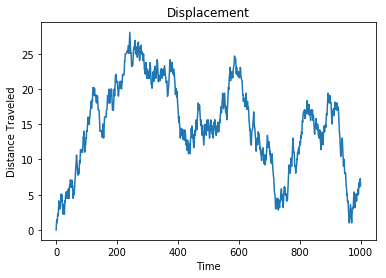

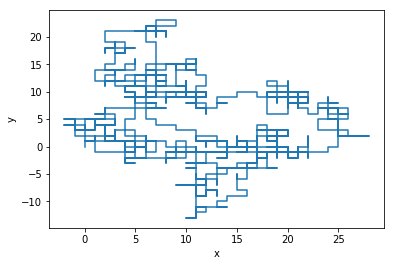

In [187]:
sim = Brownian_2D()
t, x, y = sim.main()
sim.show()

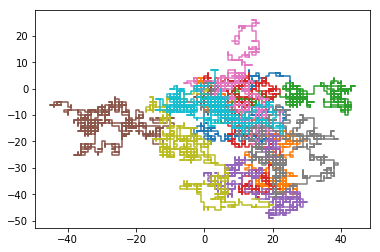

In [188]:
num_sim = 10
for _ in range(num_sim):
    sim = Brownian_2D(init=np.array([0,0]), steps=1000)
    t, x, y = sim.main()
    plt.plot(x, y)
plt.show()

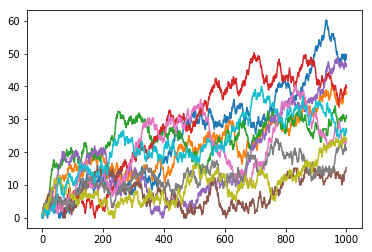

In [197]:
# for distance
num_sim = 10
for _ in range(num_sim):
    sim = Brownian_2D(init=np.array([0,0]), steps=1000)
    t, x, y = sim.main()
    distance = np.sqrt(np.power(x,2)+ np.power(y,2)) # norm
    plt.plot(t, distance)
plt.show()

In [198]:
# for distance
num_sim = 1000
S = []
for _ in range(num_sim):
    sim = Brownian_2D(init=np.array([0,0]), steps=1000)
    t, x, y = sim.main()
    distance = np.sqrt(np.power(x,2)+ np.power(y,2)) # norm
    S.append(distance[-1])
print(f"{num_sim} micro-states")
print(f"Mean: {np.mean(S)}")
print(f"Standard Deviation: {np.std(S)}")

1000 micro-states
Mean: 27.717442578866454
Standard Deviation: 14.517622976480723


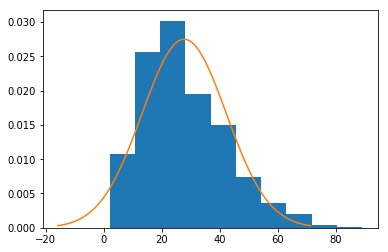

In [199]:
# visualize the distribution -- Does this support the CLT?
plt.hist(S, density=True)
mu = np.mean(S)
sigma = np.std(S)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

Distance can only be positive, so this actually looks more like a log-normal distribution than a normal distribution.

# Geometric Brownian Motion

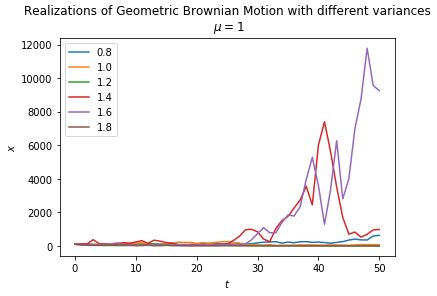

In [200]:
# From wikipedia

mu = 1
n = 50
dt = 0.1
x0 = 100
# np.random.seed(1)

sigma = np.arange(0.8, 2, 0.2)

x = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(len(sigma), n)).T
)
x = np.vstack([np.ones(len(sigma)), x])
x = x0 * x.cumprod(axis=0)

plt.plot(x)
plt.legend(np.round(sigma, 2))
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Realizations of Geometric Brownian Motion with different variances\n $\mu=1$"
)
plt.show()

In [201]:
# step by step
class GBM:
    def __init__(self, x0=100, mu=1, sigma=1, steps=100, dt=0.1):
        self.x = [x0]
        self.mu = mu
        self.sigma = sigma
        self.steps=steps
        self.step_size = dt
        self.t = [0]
        
    def main_step(self):
        for _ in range(self.steps):
            z = np.random.normal(0, np.sqrt(self.step_size))
            next_step = self.x[-1] * np.exp((self.mu - self.sigma ** 2/2)*self.step_size + self.sigma * z)
            self.x.append(next_step)
            self.t.append(self.t[-1] + 1)
        return self.t, self.x
    
    def main_t0(self):
        z = 0
        for k in range(self.steps):
            z += np.random.normal(0, np.sqrt(self.step_size))
            next_step = self.x[0] * np.exp((self.mu - self.sigma ** 2/2)*self.step_size*k + self.sigma * z)
            self.x.append(next_step)
            self.t.append(self.t[-1] + 1)
        return self.t, self.x
        
        
    def show(self):
        plt.plot(self.t, self.x)
        plt.show()

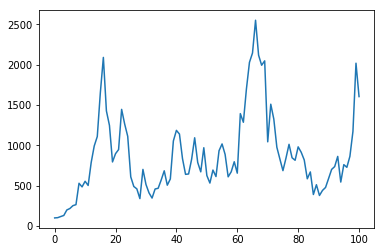

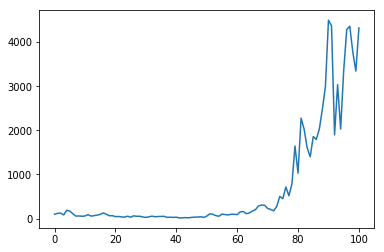

In [202]:
sim = GBM()
sim.main_step()
sim.show()
sim = GBM()
sim.main_t0()
sim.show()

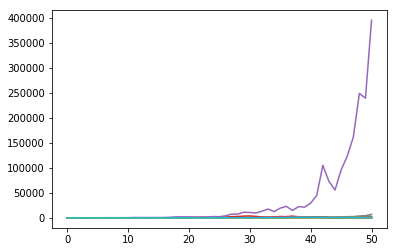

In [203]:
# updating every step
num_sim = 10
for _ in range(num_sim):
    sim = GBM(steps=50, dt=0.1)
    t, x = sim.main_step()
    plt.plot(t, x)
plt.show()

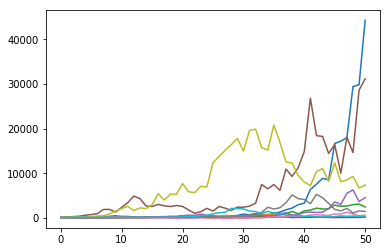

In [204]:
# updating with t0
num_sim = 10
for _ in range(num_sim):
    sim = GBM(steps=50, dt=0.1)
    t, x = sim.main_t0()
    plt.plot(t, x)
plt.show()

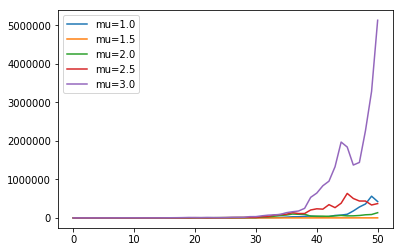

In [205]:
# different mu
mu = np.linspace(1, 3, 5)
for m in mu:
    sim = GBM(mu=m, steps=50, dt=0.1)
    t, x = sim.main_t0()
    plt.plot(t, x, label=f"mu={round(m,2)}")
plt.legend()
plt.show()

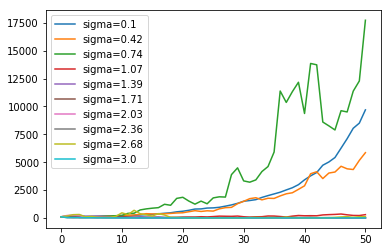

In [206]:
# different sigma
sigma = np.linspace(0.1, 3, 10)
for sig in sigma:
    sim = GBM(sigma=sig, steps=50, dt=0.1)
    t, x = sim.main_t0()
    plt.plot(t, x, label=f"sigma={round(sig,2)}")
plt.legend()
plt.show()

In [207]:
# mean and standard deviation
num_sim = 10000
S = []

for _ in range(num_sim):
    sim = GBM(mu=1, sigma=1, x0=100, steps=50, dt=0.1)
    t, x = sim.main_step()
    S.append(x[-1])
print(f"{num_sim} amicro-states")
print(f"Mean: {np.mean(S)}")
# print(f"Theoretical:{100*np.exp(1*100*0.1 - 1**2/2 * 100*0.1)}")
print(f"Standard Deviation: {np.std(S)}")

10000 amicro-states
Mean: 14316.335969660964
Standard Deviation: 82388.02317344853


(array([2.83064240e-06, 8.82795919e-09, 5.41068466e-09, 1.13909151e-09,
        2.84772877e-10, 5.69545754e-10, 2.84772877e-10, 2.84772877e-10,
        0.00000000e+00, 2.84772877e-10]),
 array([5.34991539e-01, 3.51157573e+05, 7.02314611e+05, 1.05347165e+06,
        1.40462869e+06, 1.75578572e+06, 2.10694276e+06, 2.45809980e+06,
        2.80925684e+06, 3.16041388e+06, 3.51157091e+06]),
 <a list of 10 Patch objects>)

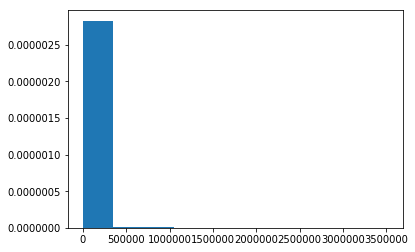

In [208]:
plt.hist(S, density=True)

The graph looks like a log normal distribution.